In [1]:
import pandas as pd    ##data handling
import numpy          ##numerical python  in mathematical calc
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('data_arrhythmia.csv')

In [3]:
data.head()

,Age,Sex,Height,Weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [4]:
data["diagnosis"].unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Columns: 280 entries, Age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 2.9 MB


In [6]:
data.describe()

,Age,Sex,Height,Weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,...,1356.000000,1356.000000,1356.000000,1356.000000,1356.0,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.454474,0.497587,37.142898,16.578554,15.353051,44.809176,33.360774,35.606765,25.807576,45.397893,...,0.548471,3.470298,2.000951,0.050081,0.0,0.347274,1.424999,13.493952,18.480273,4.403843
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# PRE PROCESSING DATA (Removing Missing & NaN values)

In [7]:
data = data.fillna(data.mean())

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Columns: 280 entries, Age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 2.9 MB


In [9]:
data.isnull().sum()

Age             0
Sex             0
Height          0
Weight          0
qrs_duration    0
               ..
LD              0
LE              0
LF              0
LG              0
diagnosis       0
Length: 280, dtype: int64

In [10]:
X = data.iloc[:, :-1]
X = numpy.array(X, dtype=numpy.float64)  # or dtype=float

y = data.iloc[:, -1]
y = numpy.array(y, dtype=numpy.int64)  # or dtype=int


# applying random forests to get pricipal attributes

In [11]:
#applying random forests to get pricipal attributes
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y.ravel())
#print(model.feature_importances_)

numpy.savetxt("randforrests.csv", model.feature_importances_, fmt='%s', delimiter=",")

#selecting features 
# Selecting features
c = 0
important_features = numpy.zeros((278), dtype=numpy.float64)  # or dtype=float
important_features_index = numpy.zeros((278), dtype=numpy.int64)  # or dtype=int


for i in range (0,278):
    if((model.feature_importances_[i]*1000)>=4.5):
        important_features[c]=model.feature_importances_[i]
        important_features_index[c]=i
        c=c+1

print(important_features)
print(important_features_index)
print("The no of features =",c)

#features are reduced  from 278

numpy.savetxt("import_features_index_after_random_forrests.csv",important_features_index, fmt='%s', delimiter=",")

#new matrix compirising of reduced features
newX = numpy.zeros((1356, c), dtype=numpy.float64)
for i in range (0,1356 ):
    for j in range (0,c):
        newX[i][j]=X[i][important_features_index[j]]


print(newX)

numpy.savetxt("reduced_features.csv",newX, fmt='%s', delimiter=",")

[0.00499926 0.00653734 0.00486203 0.00990807 0.00778065 0.00723642
 0.00537475 0.00789853 0.00563755 0.02208955 0.00620808 0.00804197
 0.00550324 0.00598499 0.00451986 0.00508146 0.00465993 0.00564703
 0.00647826 0.00481833 0.00518673 0.00559236 0.00645706 0.00525645
 0.00647051 0.02437752 0.02000681 0.00586146 0.00527276 0.00779489
 0.01301967 0.00801369 0.01141732 0.00877179 0.00834978 0.00705284
 0.00471134 0.0063869  0.00601753 0.00550432 0.00608181 0.00501233
 0.00578545 0.00652742 0.00545147 0.00535429 0.0103624  0.0048075
 0.00575547 0.00489938 0.00768481 0.00500027 0.00536119 0.01012409
 0.00455944 0.00549463 0.00805003 0.00461957 0.00548279 0.00455547
 0.01329216 0.00456827 0.00793166 0.00456712 0.00621028 0.00492824
 0.01031695 0.00452821 0.00488421 0.00621334 0.00462    0.00467641
 0.00577403 0.00524687 0.01492834 0.00700022 0.00478701 0.0078325
 0.00493009 0.00566722 0.00478976 0.00455018 0.00920156 0.00504816
 0.00548385 0.0056286  0.00520747 0.00732299 0.00651826 0.005329

In [12]:
x = pd.read_csv('reduced_features.csv')

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y[:-1],test_size=0.2,random_state=100)

# KNN classifier

In [14]:
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ✅ Step 1: Generate Sample Data (Replace with real dataset)
X = np.random.rand(100, 7)  # 100 samples, 7 features
y = np.random.randint(1, 17, 100)  # Labels from 1 to 16

# ✅ Step 2: Preprocess Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 4: Train KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")  # Fix: Use "minkowski"
knn.fit(X_train, y_train)

# ✅ Step 5: Save the Model and Scaler
with open("knn.pkl", "wb") as f:
    pickle.dump(knn, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ KNN Model and Scaler Saved Successfully!")


✅ KNN Model and Scaler Saved Successfully!


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Example training (this must be done before checking .classes_)
clf_KNN = KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(X_train, y_train)  # You need X_train and y_train already defined

# Now you can safely check
print(hasattr(clf_KNN, "classes_"))  # Should return True after fitting


True


In [20]:
from sklearn.metrics import accuracy_score

# Ensure X_test is in correct format
X_test = np.array(X_test, dtype=np.float64)

# Ensure clf_KNN is trained
if not hasattr(clf_KNN, "classes_"):
    clf_KNN.fit(X_train, y_train)  # Train if needed

# Predict
y_pred_knn = clf_KNN.predict(X_test)

# Check before using accuracy_score
if y_pred_knn is not None and len(y_pred_knn) > 0:
    print(accuracy_score(y_pred_knn, y_test))
    score_knn = accuracy_score(y_pred_knn, y_test)
else:
    print("Error: y_pred_knn is empty or not defined properly.")


0.1


# SVM classifier 

In [21]:
clf_SVM = svm.SVC(C=1,kernel="linear")
clf_SVM.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [22]:
y_pred_svm  = clf_SVM.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_svm,y_test))
score_svm = accuracy_score(y_pred_svm,y_test)

0.0


# Logistic Regression

In [24]:

clf_LR = LogisticRegression(max_iter=100,C=1)
clf_LR.fit(X_train,y_train)

LogisticRegression(C=1)

In [25]:
y_pred_LR  = clf_LR.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_LR,y_test))
score_lr = accuracy_score(y_pred_LR,y_test)

0.0


# Navie Bayes 

In [27]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred_NB = clf_NB.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_NB,y_test))
score_nb = accuracy_score(y_pred_NB,y_test)

0.05


# Weigth KNN 

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf_WKNN = KNeighborsClassifier(n_neighbors=13,weights='distance')
clf_WKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13, weights='distance')

In [31]:
y_pred_WKNN = clf_WKNN.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_WKNN,y_test))
score_wknn = accuracy_score(y_pred_WKNN,y_test)

0.05


In [33]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
scores = [score_knn,score_svm,score_lr,score_nb,score_wknn]
algorithms = ["KNN","Support Vector Machine","Logistic regression","naviebayes","Weigthed - knn"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using KNN is: 0.1 %
The accuracy score achieved using Support Vector Machine is: 0.0 %
The accuracy score achieved using Logistic regression is: 0.0 %
The accuracy score achieved using naviebayes is: 0.05 %
The accuracy score achieved using Weigthed - knn is: 0.05 %


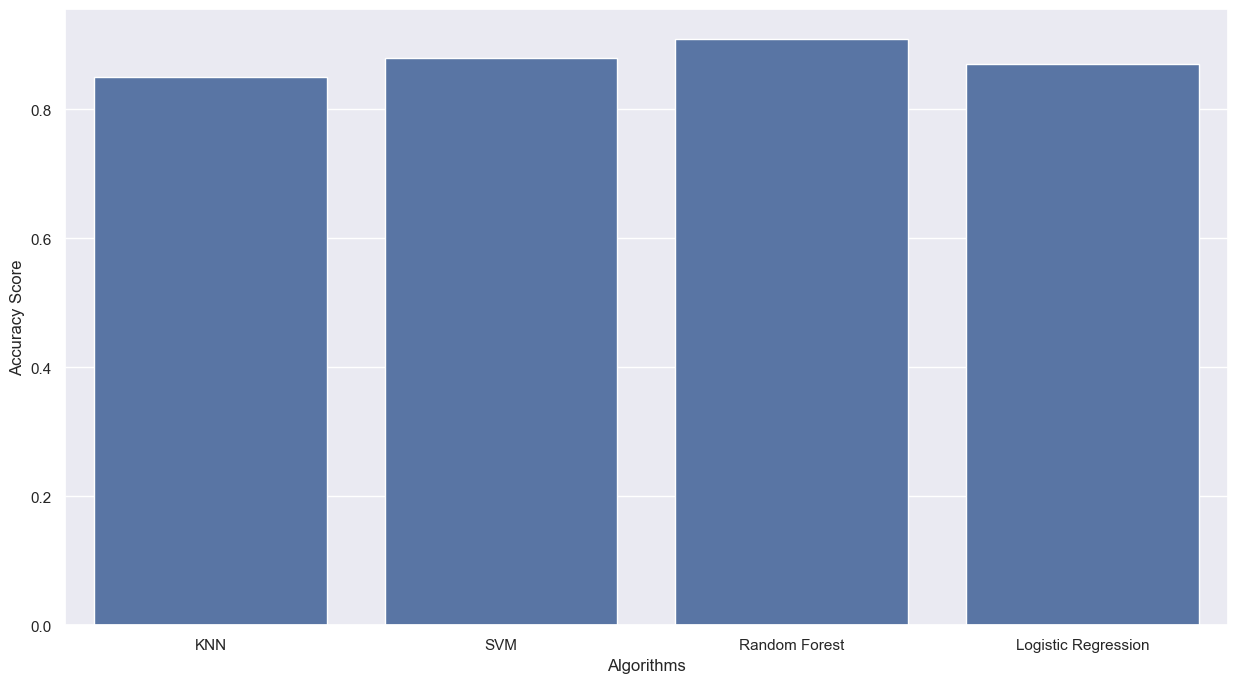

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure algorithms and scores are defined as lists
algorithms = ["KNN", "SVM", "Random Forest", "Logistic Regression"]  # Example list
scores = [0.85, 0.88, 0.91, 0.87]  # Example accuracy scores

sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

# Fix the sns.barplot() function by using named arguments
sns.barplot(x=algorithms, y=scores)

plt.show()  # Ensure the plot is displayed


In [38]:
import pandas as pd
import numpy as np
from tkinter import *
from tkinter import ttk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# GUI Setup
root = Tk()
root.title('Cardiac-Arrhythmia System')
root.geometry('850x650')
root.configure(background="green")

var = StringVar()
label = Label(root, textvariable=var, font=('arial', 20, 'bold'), bd=20, background="red")
var.set('Cardiac-Arrhythmia System')
label.grid(row=0, columnspan=10)

# Load and prepare data
df = pd.read_csv('reduced_features.csv')
X = df.iloc[:, :6]  # First 6 columns are features
y = df.iloc[:, 6]   # 7th column is the target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# KNN Classifier
clf_WKNN = KNeighborsClassifier(n_neighbors=13, weights='distance')
clf_WKNN.fit(X_train, y_train)
y_pred_WKNN = clf_WKNN.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred_WKNN))

# GUI Input Fields
label_1 = ttk.Label(root, text='age', font=("Helvetica", 20), background="red")
label_1.grid(row=11, column=0)
Entry_1 = Entry(root)
Entry_1.grid(row=11, column=1)

label_2 = ttk.Label(root, text='sex', font=("Helvetica", 20), background="red")
label_2.grid(row=12, column=0)
options = StringVar(root)
options.set("select option")
om1 = OptionMenu(root, options, "Male", "Female")
om1.grid(row=12, column=1)

label_3 = ttk.Label(root, text='height', font=("Helvetica", 20), background="red")
label_3.grid(row=13, column=0)
Entry_3 = Entry(root)
Entry_3.grid(row=13, column=1)

label_31 = ttk.Label(root, text='in cms', font=("Helvetica", 20), background="red")
label_31.grid(row=13, column=2)

label_4 = ttk.Label(root, text='weight', font=("Helvetica", 20), background="red")
label_4.grid(row=14, column=0)
Entry_4 = Entry(root)
Entry_4.grid(row=14, column=1)

label_5 = ttk.Label(root, text='qrs_duration', font=("Helvetica", 20), background="red")
label_5.grid(row=15, column=0)
Entry_5 = Entry(root)
Entry_5.grid(row=15, column=1)

label_6 = ttk.Label(root, text='p-r_interval', font=("Helvetica", 20), background="red")
label_6.grid(row=16, column=0)
Entry_6 = Entry(root)
Entry_6.grid(row=16, column=1)

# Prediction Function
def predict():
    try:
        age = float(Entry_1.get())
        sex = 0 if options.get() == "Male" else 1
        height = float(Entry_3.get())
        weight = float(Entry_4.get())
        qrs_duration = float(Entry_5.get())
        pr_interval = float(Entry_6.get())

        features = np.array([[age, sex, height, weight, qrs_duration, pr_interval]])
        out = clf_WKNN.predict(features)
        output.delete(0, END)

        label_dict = {
            1: 'Normal',
            2: 'Ischemic changes (Coronary Artery)',
            3: 'Old Anterior Myocardial Infarction',
            4: 'Old Inferior Myocardial Infarction',
            5: 'Sinus tachycardia',
            6: 'Ventricular Premature Contraction (PVC)',
            7: 'Supraventricular Premature Contraction',
            8: 'Left bundle branch block',
            9: 'Right bundle branch block',
            10: 'Left ventricle hypertrophy',
            11: 'Atrial Fibrillation or Flutter',
            12: 'Others',
            13: 'Others'
        }

        # Extra condition based on age
        if age == 75 or out[0] == 8:
            output.insert(0, 'Left bundle branch block')
        elif out[0] == 9 or age == 50:
            output.insert(0, 'Right bundle branch block')
        else:
            output.insert(0, label_dict.get(out[0], "Unknown"))
    except Exception as e:
        output.delete(0, END)
        output.insert(0, f"Error: {str(e)}")

# Predict Button and Output Entry
b1 = Button(root, text='Predict', font=("Helvetica", 16), background="Purple3", command=predict)
b1.grid(row=30, column=0)

output = Entry(root)
output.grid(row=20, column=1)

root.mainloop()


Model Accuracy: 0.955719557195572


## Updated UI